# **Initialize data**

In [0]:
import tensorflow as tf
import numpy as np
import networkx as nx
import math

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import re
lineFinder = re.compile('(\d+\s+\d+.*\n)')
# Options com-youtube.ungraph.txt  ca-HepTh.txt roadNet-CA.txt
with open('/content/drive/My Drive/CA-GrQc.txt', 'r') as f:
   file = f.read()
singleLines = list(map(lambda x: np.fromstring(x, dtype=int, sep=' '), lineFinder.findall(file)))
G = nx.from_edgelist(np.column_stack(singleLines).T)
G = nx.convert_node_labels_to_integers(G)
print(G.size())

14496


# **Create Laplacian Matrices**

In [0]:
from scipy.sparse import lil_matrix
adjacency_matrix = lil_matrix((len(G.nodes()), len(G.nodes())))
#diag_matrix = lil_matrix((len(G.nodes()), len(G.nodes())))
normal_laplacian = lil_matrix((len(G.nodes()), len(G.nodes())))
print(adjacency_matrix.shape)
G = nx.convert_node_labels_to_integers(G)
for edge in G.edges():
  adjacency_matrix[edge[0],edge[0]] = 0
  adjacency_matrix[edge[1],edge[1]] = 0
for edge in G.edges():
  adjacency_matrix[edge[0],edge[1]] = -1
  adjacency_matrix[edge[1],edge[0]] = -1
  adjacency_matrix[edge[0],edge[0]] += 1
  adjacency_matrix[edge[1],edge[1]] += 1
print(adjacency_matrix.getnnz())
for edge in G.edges():
  degree_v1 = adjacency_matrix[edge[0],edge[0]]
  degree_v2 = adjacency_matrix[edge[1],edge[1]]
  total_deg1 = -1/(math.sqrt(degree_v1*degree_v2))
  normal_laplacian[edge[0],edge[1]] = total_deg1
  normal_laplacian[edge[1],edge[0]] = total_deg1
  normal_laplacian[edge[0],edge[0]] = 1.0
  normal_laplacian[edge[1],edge[1]] = 1.0
print(normal_laplacian.getnnz())

(5242, 5242)
34210
34210


# **Solve for Eigenvectors/values**

In [0]:
from scipy.sparse.linalg import eigsh
import time
start_time = time.time()
eigenvalues, eigenvectors = eigsh(normal_laplacian, k=75, which='SA')
print("eigenvectors found")
print(time.time()-start_time)
print("\n")


eigenvectors found
174.23083209991455




In [0]:
unrelaxed_eigenvectors =[]
for i in range(len(eigenvectors)):
  new_vec = []
  for j in range(len(eigenvectors[0])):

    if eigenvectors[i][j] > 0:
      #new_vec.append(1)
      new_vec.append(eigenvectors[i][j]**(1/7))
    else:
      #new_vec.append(-1)
      new_vec.append(-(-eigenvectors[i][j])**(1/7))
  unrelaxed_eigenvectors.append(new_vec)
print(len(unrelaxed_eigenvectors))
print(len(unrelaxed_eigenvectors[0]))

5242
75


75
5242


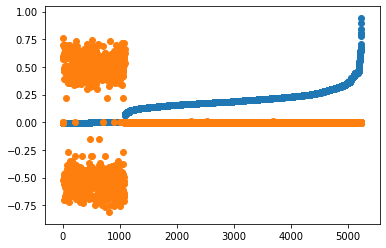

In [0]:
from matplotlib import pyplot as plt
sorted_eigens = sorted(unrelaxed_eigenvectors, key= lambda x: x[1])
t_unrelaxed_eigenvectors = np.array(sorted_eigens).T.tolist()
print(len(t_unrelaxed_eigenvectors))
print(len(t_unrelaxed_eigenvectors[0]))
plt.scatter(range(len(t_unrelaxed_eigenvectors[0])),(t_unrelaxed_eigenvectors[1]))
plt.scatter(range(len(t_unrelaxed_eigenvectors[0])),(t_unrelaxed_eigenvectors[25]))
#plt.scatter(range(len(t_unrelaxed_eigenvectors[0])),(t_unrelaxed_eigenvectors[3]))
#plt.scatter(range(len(t_unrelaxed_eigenvectors[0])),(t_unrelaxed_eigenvectors[4]))

In [0]:

import networkx.algorithms.community as algos
from sklearn.cluster import KMeans
for i in range (1,2):
  start_time = time.time()
  best_communities_score =0
  for j in range(2):
    communities = sig_kmeans_test(G,75)
    if mod_score(communities,G) > best_communities_score :
      best_communities = communities
      best_communities_score = mod_score(communities,G)
  print("Modularity for k=" + str(75))
  print(mod_score(best_communities,G))
  print("Time is")
  print(time.time()-start_time)
lengths = []
print("---------------")
print(communities)
for community in communities:
  lengths.append(len(community))
  print(len(community))
print("Std Deviation is")
print(np.std(lengths))
# group1 = []
# group2= []
# for vec in range(len(eigenvectors)):
#     if(eigenvectors[vec][0] >= 0):
#       group1.append(vec)
#     else:
#       group2.append(vec)

# print(len(group1))
# print(len(group2))
# print(algos.is_partition(G,[group1,group2]))
# print(mod_score([group1,group2],G))

Modularity for k=75
0.7999707362943083
Time is
7.919710874557495
---------------
[{0, 1, 1537, 3, 5, 6, 7, 8, 520, 2060, 3596, 5135, 20, 22, 23, 25, 538, 27, 28, 30, 31, 4128, 3105, 34, 35, 3107, 37, 38, 39, 3108, 4129, 4130, 43, 4131, 46, 47, 1070, 51, 52, 56, 1082, 59, 62, 63, 64, 65, 1601, 1090, 1600, 1093, 1094, 1602, 2111, 1097, 1099, 1100, 3155, 3156, 3157, 3667, 3668, 4184, 4712, 4713, 620, 633, 121, 4217, 4218, 4219, 4236, 4237, 1678, 1679, 1680, 657, 4238, 4239, 4240, 4241, 4245, 2218, 2219, 2220, 685, 2221, 2222, 2224, 2225, 2226, 2227, 2228, 4791, 3272, 2257, 2787, 740, 741, 742, 743, 2278, 2279, 746, 747, 750, 751, 753, 754, 755, 756, 1790, 1791, 1793, 1795, 1796, 1797, 1798, 3331, 3334, 2316, 2317, 2319, 2320, 4369, 1816, 1308, 1309, 1310, 1311, 4894, 4895, 4896, 2355, 3386, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 1882, 1883, 4442, 4443, 2910, 4444, 1900, 2936, 2937, 2939, 4483, 4484, 3471, 3473, 2962, 3476, 3477, 2454, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1

In [0]:

for n in communities:
  print(len(n))

# **Testing**

In [0]:
def mod_score(communities,G):
  total_sum = 0
  m = len(G.edges())
  for community in communities:
    summation = len(G.subgraph(community).edges())
    totaldegree=sum(n for _, n in G.degree(community)) 
    total_sum += ((summation/m)-(totaldegree/(2*m))**2)
  return total_sum

In [0]:
def sig_kmeans_test(G,k):
  kmeans = KMeans(n_clusters=k,precompute_distances=True).fit_predict(unrelaxed_eigenvectors)
  result = []
  for j in range(k):
    result2 = set()
    for i in range(len(kmeans)):
      if(kmeans[i]==j):
        result2.add(i)
    result.append(result2)
  return result
# for i in [2**j for j in range(10)]:
#   performance_time_checker(G,sig_kmeans_test,i)